<a href="https://colab.research.google.com/github/MitsuyoMurata/Mitsuyo-Murata/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evolving Definitions: Analyzing the Granularity of SME Classifications in Japan**


---



# **Introduction, Research Questions and Hypotheses**

In Japan, small and medium-sized enterprises (SMEs), micro-enterprises, and medium-sized companies are legally defined by capital and number of employees, and policies targeting these company sizes are implemented. The thresholds for classification differ between industries. For example, in manufacturing, companies with capital of 300 million yen or less or 300 or fewer regular employees are SMEs, those with 20 or fewer employees are small businesses, and those with 2,000 or fewer employees excluding SMEs are medium-sized enterprises.



Figure : Classification of Enterprises by Size in Japan

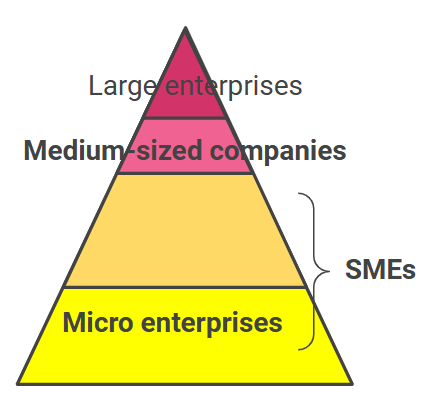

SMEs were first distinguished from larger companies and provided with special support measures under *Small and Medium-sized Enterprise Basic Act*, enacted in 1963. Furthermore, in 2014, *Basic Act on Small Enterprise Promotion* was enacted, consolidating support measures for micro-enterprises. Most recently, in 2024, *Revised Industrial Competitiveness Enhancement Act* introduced new support measures for medium-sized companies.

While some criticize that defining company sizes and categorizing policy targets can create incentives for businesses to deliberately keep their size below a certain threshold, this process of defining company sizes has continued to become more granular over time.

Thus, the research questions for this project are as follows:

**Why has the classification of SMEs continued to become more granular over time? What discussions have taken place in the process of this trend?**

This project will analyze trends in parliamentary discussions during the periods when the three corporate classifications mentioned above were defined and their support measures legislated. Through this comparison, the purpose and context behind such detailed definitions of company sizes are expected to become clearer. This historical approach aims to provide insights into how economic policy has evolved in Japan, particularly regarding policies targeting SMEs.

The initial hypothesis for the research question is that this is because of the need for new targeting in response to the emerging policy demands of each era, due to the development and stagnation of the Japanese economy from the post-World War II period to the present, arose in the 1960s, 2010s, and 2020s. Thus, words symbolizing historical contexts such as post-war reconstruction, the Heisei recession, deflation, and inflation are expected to surface in the parliament records.



# **Methods**

In this study, the following steps (1 to 4) were taken to pursue answers to the research question. Python was used in steps 2 through 4.

STEP1: Identify the Relevant Deliberation Periods

STEP2: Collect Diet Records and Translate them through API

STEP3: Clean and Process the Text Data

STEP 4: Analyze Token and Identify Historical Trends by using Word Cloud, TF-IDF, Keywords Frequency Count, and Topic Modeling


# **Codes and Results**

# **STEP1: Identify the Relevant Deliberation Periods**

Firstly, I identified the periods when *Small and Medium-sized Enterprise Basic Act*, *Basic Act on Small Enterprise Promotion*, and *Revised Industrial Competitiveness Enhancement Act* were debated in the Diet. By using resources from  [the Index of Japanese Laws and Regulations](https://hourei.ndl.go.jp/#/), I determined the specific dates for discussing these laws.

As a result, it was revealed that each law was deliberated in the plenary sessions of the House of Representatives and the House of Councilors during the following periods. The deliberations took place in the "main meetings" and "meetings on Commerce and Industry and Economic Affairs" of both Houses.

*  *Small and Medium-sized Enterprise Basic Act*: 1963/02/19 ~ 1963/07/06

*  *Basic Act on Small Enterprise Promotion*: 2014/05/20 ~ 2014/06/20

*  *Revised Industrial Competitiveness Enhancement Act*: 2024/04/05 ~ 2024/05/31

# **STEP2: Collect Diet Records and Translate them through API**

Secondly, I downloaded the minutes of the deliberation periods for the three laws using  [the Diet Proceedings Search System API](https://kokkai.ndl.go.jp/api.html) of Japan. I specified the deliberation periods, the meetings where the deliberations took place, and the law names as keywords, and then collected all related deliberations through the API. Since the Diet Proceedings Search System API states the encoding as “utf-8,” I used this setting and downloaded the data in JSON format.After extracting speech data, I saved it in my Google Drive as text files.

Then, I translated the text files from Japanese to English using [the DeepL API](https://www.deepl.com/en/pro-api). Since the DeepL API only accepts files with fewer than 2,000 words, I split the text into segments of less than 2,000 words and saved the translated files to Google Drive.



In [1]:
pip install deepl

In [2]:
import requests
import json
import re
import os
import deepl

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
response = requests.get("https://kokkai.ndl.go.jp/api/speech?from=1963-02-19&until=1963-07-06&nameOfMeeting=本会議 商工委員会&any=中小企業基本法&recordPacking=json")

In [5]:
print(response.status_code)

200


In [6]:
response.encoding = 'utf-8'

In [7]:
data1963 = response.json()

In [8]:
def jprint(obj):
    text = json.dumps(obj, ensure_ascii=False, sort_keys=True, indent=4)
    print(text)

In [9]:
type(data1963)

dict

In [10]:
def extract_and_clean_speech(data1963):
    speeches = []
    for record in data1963.get("speechRecord", []):
        speech1963 = record.get("speech", "")

        cleaned_speech1963 = re.sub(r"\r\n|\r|\n", " ", speech1963)
        cleaned_speech1963 = re.sub(r"　+", " ", cleaned_speech1963)
        cleaned_speech1963 = re.sub(r"—————————————|…………………………………|〔.*?〕", "", cleaned_speech1963)
        speeches.append(cleaned_speech1963.strip())
    return speeches

cleaned_speeches = extract_and_clean_speech(data1963)


In [11]:
file_path = '/content/drive/MyDrive/Python_course_2024/Final_Project/text1963.txt'

In [12]:
with open(file_path, 'w', encoding="utf-8") as file:
    for speech1963 in cleaned_speeches:
        file.write(speech1963 + "\n")

print(f"Data saved to {file_path}")

Data saved to /content/drive/MyDrive/Python_course_2024/Final_Project/text1963.txt


In [13]:
def split_and_save_file(input_file, output_prefix, output_folder, max_length=2000):
    os.makedirs(output_folder, exist_ok=True)

    with open(input_file, 'r', encoding='utf-8') as file:
        content = file.read()

    parts = []
    while len(content) > max_length:
        split_index = content[:max_length].rfind('。')
        if split_index == -1:
            split_index = max_length
        parts.append(content[:split_index + 1].strip())
        content = content[split_index + 1:].strip()
    parts.append(content)

    for i, part in enumerate(parts, start=1):
        output_file = os.path.join(output_folder, f"{output_prefix}_{i}.txt")
        with open(output_file, 'w', encoding='utf-8') as out_file:
            out_file.write(part)
        print(f"Saved: {output_file}")

input_file = "/content/drive/MyDrive/Python_course_2024/Final_Project/text1963.txt"
output_prefix = "text1963"
output_folder = "/content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963"
split_and_save_file(input_file, output_prefix, output_folder)


Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_1.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_2.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_3.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_4.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_5.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_6.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_7.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_8.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_9.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_10.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Proj

In [14]:
DEEPL_API_KEY = "82236f11-e506-4e6d-baaa-e673db8d1e0a"
translator = deepl.Translator(DEEPL_API_KEY)

def translate_and_save(input_folder, output_folder, source_lang="JA", target_lang="EN-US"):
    os.makedirs(output_folder, exist_ok=True)

    for filename in sorted(os.listdir(input_folder)):
        if filename.endswith(".txt"):
            input_file_path = os.path.join(input_folder, filename)
            output_file_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_translated.txt")

            try:
                with open(input_file_path, 'r', encoding='utf-8') as file:
                    original_text = file.read()

                print(f"Translating: {input_file_path}")
                translated_text = translator.translate_text(original_text, source_lang=source_lang, target_lang=target_lang)

                with open(output_file_path, 'w', encoding='utf-8') as file:
                    file.write(translated_text.text)

                print(f"Saved: {output_file_path}")

            except FileNotFoundError:
                print(f"Error: The file '{input_file_path}' was not found.")
            except deepl.DeepLException as e:
                print(f"DeepL API error while processing {filename}: {e}")
            except Exception as e:
                print(f"An unexpected error occurred while processing {filename}: {e}")

input_folder = "/content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963"
output_folder = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files1963"

translate_and_save(input_folder, output_folder)


Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_1.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files1963/text1963_1_translated.txt
Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_10.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files1963/text1963_10_translated.txt
Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_11.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files1963/text1963_11_translated.txt
Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_12.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files1963/text1963_12_translated.txt
Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files1963/text1963_13.txt
Saved: /content/drive/MyDrive/Python_course_2024/Fina

In [15]:
response = requests.get("https://kokkai.ndl.go.jp/api/speech?from=2014-05-20&until=2014-06-20&nameOfMeeting=本会議 経済産業委員会&any=小規模企業&recordPacking=json")

In [16]:
print(response.status_code)

200


In [17]:
response.encoding = 'utf-8'

In [18]:
data2014 = response.json()

In [19]:
def extract_and_clean_speech(data2014):
    speeches = []
    for record in data2014.get("speechRecord", []):
        speech2014 = record.get("speech", "")

        cleaned_speech2014 = re.sub(r"\r\n|\r|\n", " ", speech2014)
        cleaned_speech2014 = re.sub(r"　+", " ", cleaned_speech2014)
        cleaned_speech2014 = re.sub(r"—————————————|…………………………………|〔.*?〕", "", cleaned_speech2014)
        speeches.append(cleaned_speech2014.strip())
    return speeches

cleaned_speeches = extract_and_clean_speech(data2014)


In [20]:
file_path = '/content/drive/MyDrive/Python_course_2024/Final_Project/text2014.txt'

with open(file_path, 'w', encoding="utf-8") as file:
    for speech2014 in cleaned_speeches:
        file.write(speech2014 + "\n")

print(f"Data saved to {file_path}")

Data saved to /content/drive/MyDrive/Python_course_2024/Final_Project/text2014.txt


In [21]:
def split_and_save_file(input_file, output_prefix, output_folder, max_length=2000):
    os.makedirs(output_folder, exist_ok=True)

    with open(input_file, 'r', encoding='utf-8') as file:
        content = file.read()

    parts = []
    while len(content) > max_length:
        split_index = content[:max_length].rfind('。')
        if split_index == -1:
            split_index = max_length
        parts.append(content[:split_index + 1].strip())
        content = content[split_index + 1:].strip()
    parts.append(content)

    for i, part in enumerate(parts, start=1):
        output_file = os.path.join(output_folder, f"{output_prefix}_{i}.txt")
        with open(output_file, 'w', encoding='utf-8') as out_file:
            out_file.write(part)
        print(f"Saved: {output_file}")

input_file = "/content/drive/MyDrive/Python_course_2024/Final_Project/text2014.txt"
output_prefix = "text2014"
output_folder = "/content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014"
split_and_save_file(input_file, output_prefix, output_folder)


Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_1.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_2.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_3.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_4.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_5.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_6.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_7.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_8.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_9.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_10.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Proj

In [22]:
DEEPL_API_KEY = "82236f11-e506-4e6d-baaa-e673db8d1e0a"
translator = deepl.Translator(DEEPL_API_KEY)

def translate_and_save(input_folder, output_folder, source_lang="JA", target_lang="EN-US"):
    os.makedirs(output_folder, exist_ok=True)

    for filename in sorted(os.listdir(input_folder)):
        if filename.endswith(".txt"):
            input_file_path = os.path.join(input_folder, filename)
            output_file_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_translated.txt")

            try:
                with open(input_file_path, 'r', encoding='utf-8') as file:
                    original_text = file.read()

                print(f"Translating: {input_file_path}")
                translated_text = translator.translate_text(original_text, source_lang=source_lang, target_lang=target_lang)

                with open(output_file_path, 'w', encoding='utf-8') as file:
                    file.write(translated_text.text)

                print(f"Saved: {output_file_path}")

            except FileNotFoundError:
                print(f"Error: The file '{input_file_path}' was not found.")
            except deepl.DeepLException as e:
                print(f"DeepL API error while processing {filename}: {e}")
            except Exception as e:
                print(f"An unexpected error occurred while processing {filename}: {e}")

input_folder = "/content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014"
output_folder = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2014"

translate_and_save(input_folder, output_folder)

Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_1.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2014/text2014_1_translated.txt
Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_10.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2014/text2014_10_translated.txt
Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_11.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2014/text2014_11_translated.txt
Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_12.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2014/text2014_12_translated.txt
Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2014/text2014_13.txt
Saved: /content/drive/MyDrive/Python_course_2024/Fina

In [23]:
response = requests.get("https://kokkai.ndl.go.jp/api/speech?from=2024-04-05&until=2024-05-31&nameOfMeeting=本会議 経済産業委員会&any=中堅企業&recordPacking=json")

In [24]:
print(response.status_code)

200


In [25]:
response.encoding = 'utf-8'
data2024 = response.json()

In [26]:
def extract_and_clean_speech(data2024):
    speeches = []
    for record in data2024.get("speechRecord", []):
        speech2024 = record.get("speech", "")

        cleaned_speech2024 = re.sub(r"\r\n|\r|\n", " ", speech2024)
        cleaned_speech2024 = re.sub(r"　+", " ", cleaned_speech2024)
        cleaned_speech2024 = re.sub(r"—————————————|…………………………………|〔.*?〕", "", cleaned_speech2024)
        speeches.append(cleaned_speech2024.strip())
    return speeches

cleaned_speeches = extract_and_clean_speech(data2024)


In [27]:
file_path = '/content/drive/MyDrive/Python_course_2024/Final_Project/text2024.txt'

with open(file_path, 'w', encoding="utf-8") as file:
    for speech2024 in cleaned_speeches:
        file.write(speech2024 + "\n")

print(f"Data saved to {file_path}")

Data saved to /content/drive/MyDrive/Python_course_2024/Final_Project/text2024.txt


In [28]:
def split_and_save_file(input_file, output_prefix, output_folder, max_length=2000):
    os.makedirs(output_folder, exist_ok=True)

    with open(input_file, 'r', encoding='utf-8') as file:
        content = file.read()

    parts = []
    while len(content) > max_length:
        split_index = content[:max_length].rfind('。')
        if split_index == -1:
            split_index = max_length
        parts.append(content[:split_index + 1].strip())
        content = content[split_index + 1:].strip()
    parts.append(content)

    for i, part in enumerate(parts, start=1):
        output_file = os.path.join(output_folder, f"{output_prefix}_{i}.txt")
        with open(output_file, 'w', encoding='utf-8') as out_file:
            out_file.write(part)
        print(f"Saved: {output_file}")

input_file = "/content/drive/MyDrive/Python_course_2024/Final_Project/text2024.txt"
output_prefix = "text2024"
output_folder = "/content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024"
split_and_save_file(input_file, output_prefix, output_folder)

Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_1.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_2.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_3.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_4.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_5.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_6.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_7.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_8.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_9.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_10.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Proj

In [29]:
DEEPL_API_KEY = "82236f11-e506-4e6d-baaa-e673db8d1e0a"
translator = deepl.Translator(DEEPL_API_KEY)

def translate_and_save(input_folder, output_folder, source_lang="JA", target_lang="EN-US"):
    os.makedirs(output_folder, exist_ok=True)

    for filename in sorted(os.listdir(input_folder)):
        if filename.endswith(".txt"):
            input_file_path = os.path.join(input_folder, filename)
            output_file_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_translated.txt")

            try:
                with open(input_file_path, 'r', encoding='utf-8') as file:
                    original_text = file.read()

                print(f"Translating: {input_file_path}")
                translated_text = translator.translate_text(original_text, source_lang=source_lang, target_lang=target_lang)

                with open(output_file_path, 'w', encoding='utf-8') as file:
                    file.write(translated_text.text)

                print(f"Saved: {output_file_path}")

            except FileNotFoundError:
                print(f"Error: The file '{input_file_path}' was not found.")
            except deepl.DeepLException as e:
                print(f"DeepL API error while processing {filename}: {e}")
            except Exception as e:
                print(f"An unexpected error occurred while processing {filename}: {e}")

input_folder = "/content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024"
output_folder = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2024"

translate_and_save(input_folder, output_folder)

Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_1.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2024/text2024_1_translated.txt
Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_10.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2024/text2024_10_translated.txt
Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_11.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2024/text2024_11_translated.txt
Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_12.txt
Saved: /content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2024/text2024_12_translated.txt
Translating: /content/drive/MyDrive/Python_course_2024/Final_Project/Split_Files2024/text2024_13.txt
Saved: /content/drive/MyDrive/Python_course_2024/Fina

# **STEP3: Clean and process the text data**

Thirdly, I removed unnecessary elements and tokenized the cleaned text for further analysis.

To make a more vivid comparison of the three laws, I removed words that frequently appear due to grammar (e.g., "would," "could," "like," and "more"), as well as contextually common words such as "business", "enterprise", ”small”, and “medium” that is prevalent across all three periods as stop words.
Since both set and list formats of stop words are required in subsequent processes,I defined both.


In [30]:
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
nltk.download('all')

custom_stopwords_set = {
    'mr', 'mrs', 'ms', 'dr', 'would', 'could', 'should',
    'might', 'must', 'shall', 'will', 'also', 'however',
    'therefore', 'thus', 'hence', 'even', 'yet', 'still', 'like',
    'one', 'two', 'three', 'first', 'second', 'third','business',
    'businesses','enterprise','company', 'enterprises','companies',
    'small','medium','sme','smes','sized','bill','law','act'
    }

nltk_stopwords= set(stopwords.words('english'))
stop_words_set = nltk_stopwords.union(custom_stopwords_set)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

custom_stopwords_list = [
    'mr', 'mrs', 'ms', 'dr', 'would', 'could', 'should',
    'might', 'must', 'shall', 'will', 'also', 'however',
    'therefore', 'thus', 'hence', 'even', 'yet', 'still', 'like',
    'one', 'two', 'three', 'first', 'second', 'third','business',
    'businesses','enterprise','company', 'enterprises','companies',
    'small','medium','sme','smes','sized','bill','law','act'
]

nltk_stopwords = stopwords.words('english')
stop_words_list = list(set(nltk_stopwords + custom_stopwords_list))


# **STEP 4: Analyze Token and Identify Historical Trends**

**Word Cloud and TF-IDF**

As a first step for analyzing tokens, I used Word Cloud to gain an overview of the three deliberations. In addition, I applied Term Frequency-Inverse Document Frequency (TF-IDF) analysis to identify the most important keywords in each of the three deliberations.

>  **Word Cloud and TF-IDF of *Small and Medium-sized Enterprise Basic Act* (1963)**

>  In the deliberation process of the *Small and Medium-sized Enterprises Basic Act* in 1963, words such as "introduce," "government," and "basic" stand out. As a fundamental law defining support for SMEs, the legislative process itself seems to be carefully debated.


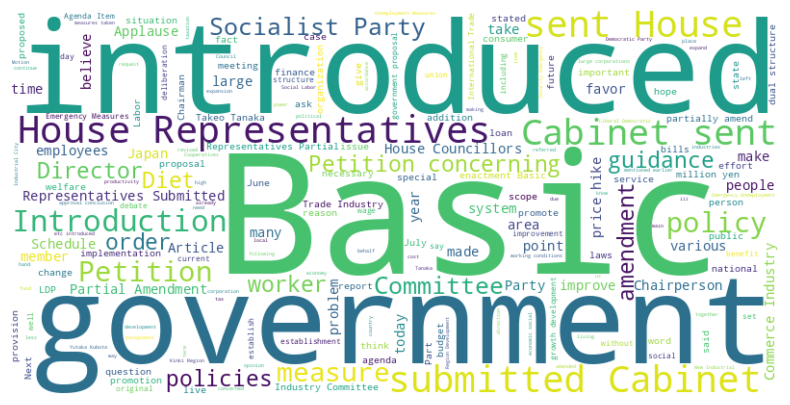

In [32]:
folder_path = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files1963"

all_text = ""
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            all_text += file.read() + " "

tokens = word_tokenize(all_text)
filtered_tokens = [word for word in tokens if word.lower() not in stop_words_set and word.isalpha()]

filtered_text = " ".join(filtered_tokens)

wordcloud1963 = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1963, interpolation='bilinear')
plt.axis("off")
plt.show()


> The following figure displays the 30 highest-scoring words based on their TF-IDF values. Since the 1963 law establishes a fundamental policy targeting SMEs, the words "introduced" and "basic" have the highest scores. Additionally, terms related to legislative matters, such as "government," "house," and "cabinet," also stand out.

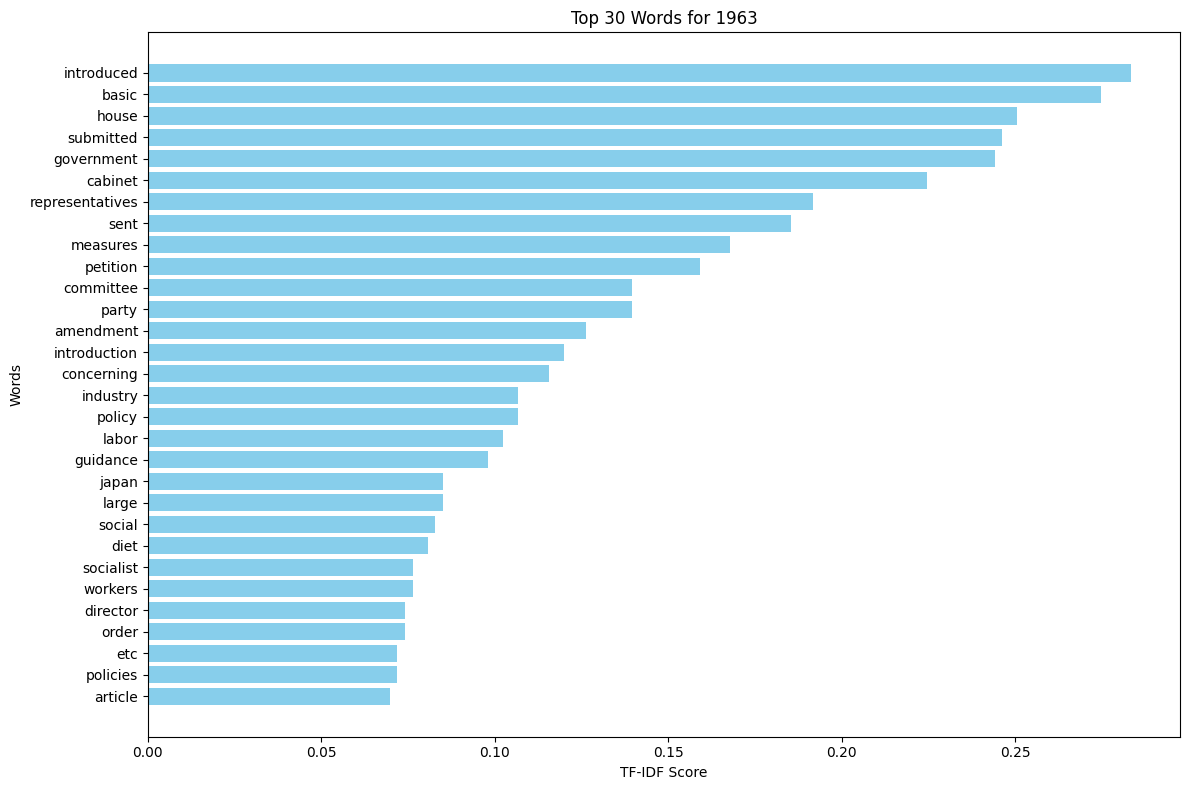

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def combine_files(folder_path):
    import os
    combined_text = ""
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                combined_text += file.read() + " "
    return combined_text

folder_1963 = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files1963"
text_1963 = combine_files(folder_1963)
documents = [text_1963]

vectorizer = TfidfVectorizer(stop_words=stop_words_list, max_features=None)
tfidf_matrix = vectorizer.fit_transform(documents)

feature_names = vectorizer.get_feature_names_out()

tfidf_scores = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
word_score_pairs = list(zip(feature_names, tfidf_scores))

top_30_words = sorted(word_score_pairs, key=lambda x: x[1], reverse=True)[:30]

words, scores = zip(*top_30_words)

plt.figure(figsize=(12, 8))
plt.barh(words, scores, color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.title('Top 30 Words for 1963')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

>  **Word Cloud and TF-IDF of *Basic Act on Small Enterprise Promotion* (2014)**

>  In the deliberation process of the *Basic Act on Small Enterprise Promotion* in 2014, words such as "support", "basic", and "local" stand out. This suggests the fact that one of the objectives of this act is to promote regional revitalization through the support of micro-enterprises.


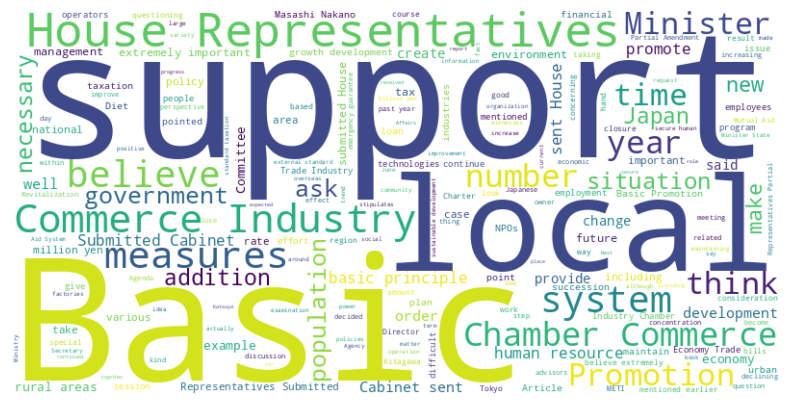

In [ ]:
folder_path = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2014"

all_text = ""
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            all_text += file.read() + " "

tokens = word_tokenize(all_text)
filtered_tokens = [word for word in tokens if word.lower() not in stop_words_set and word.isalpha()]

filtered_text = " ".join(filtered_tokens)

wordcloud2014 = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2014, interpolation='bilinear')
plt.axis("off")
plt.show()

> According to the 30 highest-scoring words based on their TF-IDF values of 2014, "basic", "scale", and "industry" marks highest scores. Furthermore, the inclusion of "local" in the ranking is a unique feature not seen in other two.

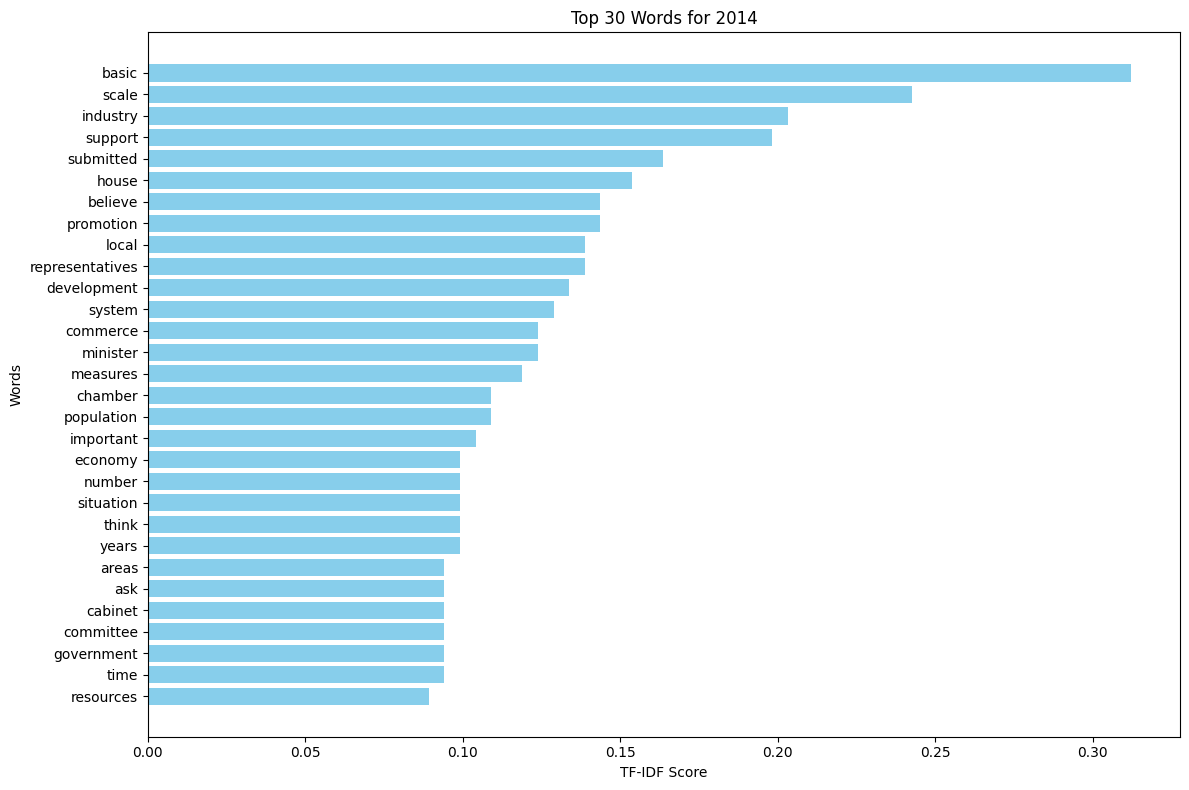

In [ ]:
def combine_files(folder_path):
    import os
    combined_text = ""
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                combined_text += file.read() + " "
    return combined_text

folder_2014 = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2014"
text_2014 = combine_files(folder_2014)
documents = [text_2014]

vectorizer = TfidfVectorizer(stop_words=stop_words_list, max_features=None)
tfidf_matrix = vectorizer.fit_transform(documents)

feature_names = vectorizer.get_feature_names_out()

tfidf_scores = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
word_score_pairs = list(zip(feature_names, tfidf_scores))

top_30_words = sorted(word_score_pairs, key=lambda x: x[1], reverse=True)[:30]

words, scores = zip(*top_30_words)

plt.figure(figsize=(12, 8))
plt.barh(words, scores, color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.title('Top 30 Words for 2014')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

> **Word Cloud and TF-IDF of *Revised Industrial Competitiveness Enhancement Act* (2024)**

>  In the deliberation process of the *Revised Industrial Competitiveness Enhancement Act* in 2024, words such as "investment", "believe", and “wage” stand out. As evidenced by this trend, this law aims to create a positive cycle for wage increases and economic growth through investment in medium-sized companies.

> Unlike the other two, the word “basic” is not prominent in 2024. This reflects the fact that the other two were enactments of basic laws to support SMEs and micro-enterprises, whereas the addition of the definition of enterprise size in 2024 was based on an amendment to the Industrial Competitiveness Enhancement Law, not a basic law.


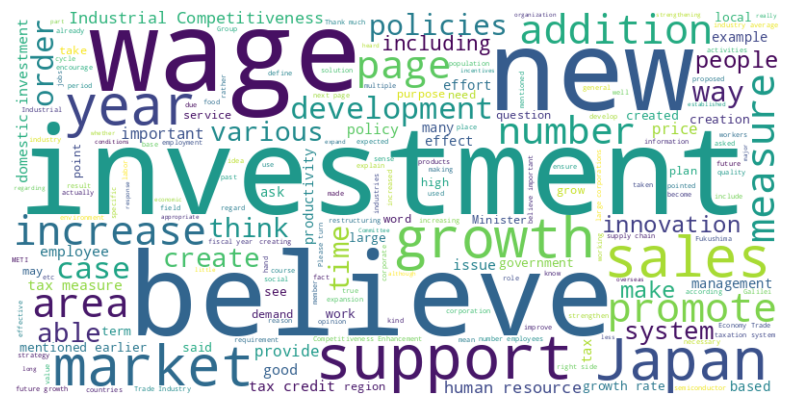

In [ ]:
folder_path = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2024"

all_text = ""
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            all_text += file.read() + " "

tokens = word_tokenize(all_text)
filtered_tokens = [word for word in tokens if word.lower() not in stop_words_set and word.isalpha()]

filtered_text = " ".join(filtered_tokens)

wordcloud2024 = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2024, interpolation='bilinear')
plt.axis("off")
plt.show()

> The bar plot of TF-IDF values for 2024 shows words "investment", "growth", and "believe" have significantly high frequency, which indicates the objective of the law: creating a positive cycle for wage increases and economic growth through investment in medium-sized companies.The keyword “tax” also ranks high because the 2024 amendment to the Industrial Competitiveness Enhancement Act newly defines medium-sized enterprises and incorporates tax benefits for certain medium-sized enterprises.

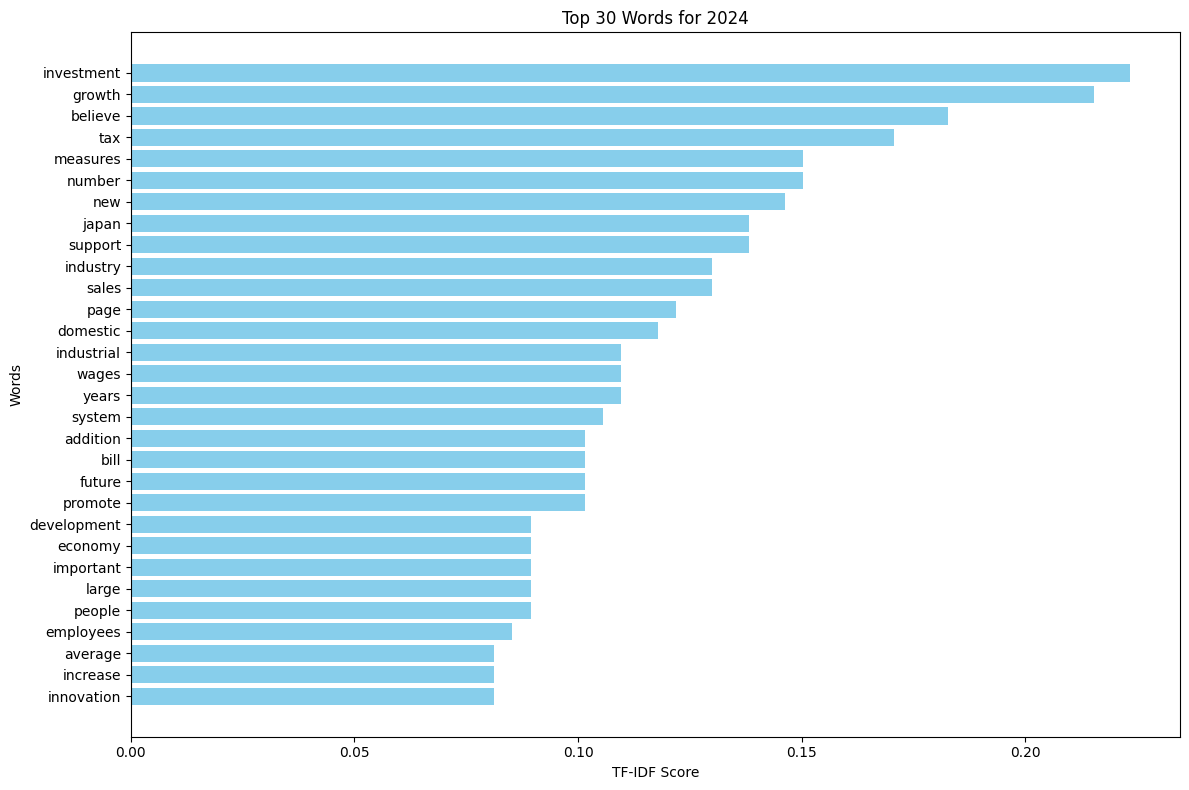

In [ ]:
def combine_files(folder_path):
    import os
    combined_text = ""
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                combined_text += file.read() + " "
    return combined_text

folder_2024 = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2024"
text_2024 = combine_files(folder_2024)
documents = [text_2024]

vectorizer = TfidfVectorizer(stop_words=stop_words_list, max_features=None)
tfidf_matrix = vectorizer.fit_transform(documents)

feature_names = vectorizer.get_feature_names_out()

tfidf_scores = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
word_score_pairs = list(zip(feature_names, tfidf_scores))

top_30_words = sorted(word_score_pairs, key=lambda x: x[1], reverse=True)[:30]

words, scores = zip(*top_30_words)

plt.figure(figsize=(12, 8))
plt.barh(words, scores, color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.title('Top 30 Words for 2024')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Keywords Frequency**

After checking the overviews of three deliberations, I compared the frequency of selected keywords across the periods.


The comparison of the frequency of use of several keywords from each period, as shown in the result, reveals the following patterns across the three legislative deliberation processes: "Basic" and "government" are most frequently used in 1963 and least frequently in 2024. "support" and "local" are most frequently used in 2014 and least frequently in 1963. "Rural" appears only in 2014. "Investment," "growth," "competitiveness," and "wedge" are clearly more frequent in 2024.

This result effectively reflects the purpose and characteristics of each law. As a fundamental law targeting policies for SMEs, the deliberation process of the *Small and Medium-sized Enterprise Basic Act* (1963) has the highest frequency for the terms "basic" and "government." Since the *Basic Act on Small Enterprise Promotion* (2014) aims to promote regional revitalization through support for micro enterprises, the score for 2014 shows the highest frequency for the terms "support," "local," and "rural." The high frequency of terms such as "investment," "growth," "competitiveness," and "wedge" indicates the goal of the *Revised Industrial Competitiveness Enhancement Act*, which aims to create a positive cycle for wage increases and economic growth through investment in medium-sized companies.


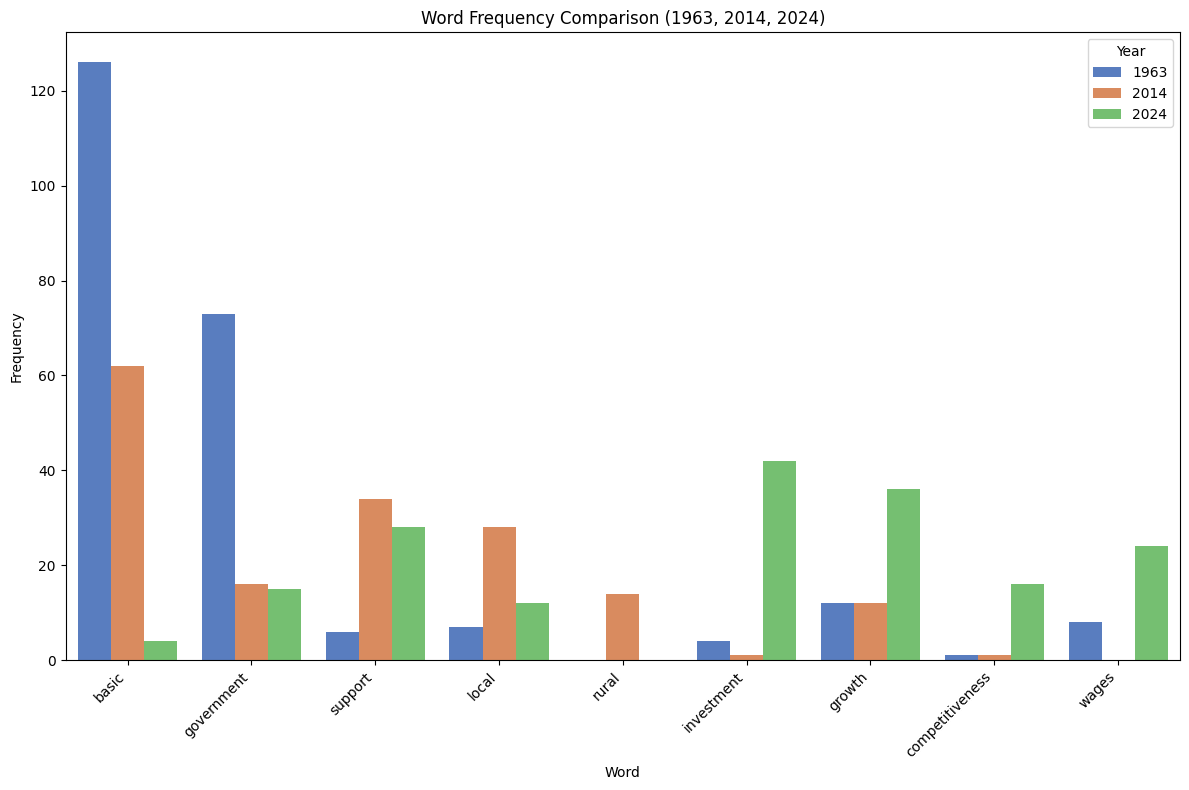

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def combine_files(folder_path):
    combined_text = ""
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                combined_text += file.read() + " "
    return combined_text

folder_1963 = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files1963"
folder_2014 = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2014"
folder_2024 = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2024"

text_1963 = combine_files(folder_1963)
text_2014 = combine_files(folder_2014)
text_2024 = combine_files(folder_2024)

def count_word_frequencies(text, words):
    words = [word.lower() for word in words]
    text_words = text.lower().split()
    filtered_words = [word for word in text_words if word.isalpha()]
    word_counts = Counter(filtered_words)
    return {word: word_counts[word] for word in words}

target_words = ["basic","government","support","local", "rural", "investment", "growth", "competitiveness", "wages",]

freq_1963 = count_word_frequencies(text_1963, target_words)
freq_2014 = count_word_frequencies(text_2014, target_words)
freq_2024 = count_word_frequencies(text_2024, target_words)

df = pd.DataFrame({
    "Word": target_words,
    "1963": [freq_1963[word] for word in target_words],
    "2014": [freq_2014[word] for word in target_words],
    "2024": [freq_2024[word] for word in target_words]
})

df_melted = df.melt(id_vars="Word", var_name="Year", value_name="Frequency")

plt.figure(figsize=(12, 8))
sns.barplot(x="Word", y="Frequency", hue="Year", data=df_melted, palette="muted")
plt.title("Word Frequency Comparison (1963, 2014, 2024)")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Topic Modeling**

Lastly, by using topic modeling, I retrieved the main topics for each of the three deliberation periods. Then, I summarized the overall topics across the three periods into five categories.


In [ ]:
pip install tomotopy


In [ ]:
import tomotopy as tp

folder_path = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files1963"

documents = []
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            words = file.read().lower().split()
            filtered_words = [word for word in words if word.isalpha() and word not in stop_words_set]
            documents.append(filtered_words)

num_topics = 5
model = tp.LDAModel(k=num_topics, min_cf=3, alpha=0.1, eta=0.01)

for doc in documents:
    model.add_doc(doc)

print("Training the model...")
for i in range(100):
    model.train(1)
    if i % 10 == 0:
        print(f"Iteration: {i}, Log-likelihood: {model.ll_per_word}")

print("\nTopics and their top terms(1963):")
for topic_id in range(model.k):
    print(f"Topic #{topic_id + 1}: ", [word for word, _ in model.get_topic_words(topic_id, top_n=10)])



Training the model...
Iteration: 0, Log-likelihood: -8.026366050739666
Iteration: 10, Log-likelihood: -6.614015743252866
Iteration: 20, Log-likelihood: -6.5016923182314805
Iteration: 30, Log-likelihood: -6.443246742158353
Iteration: 40, Log-likelihood: -6.387112468256666
Iteration: 50, Log-likelihood: -6.362960700577696
Iteration: 60, Log-likelihood: -6.349401579619454
Iteration: 70, Log-likelihood: -6.329499700229176
Iteration: 80, Log-likelihood: -6.321110034132113
Iteration: 90, Log-likelihood: -6.3087071448484995

Topics and their top terms(1963):
Topic #1:  ['believe', 'japan', 'many', 'committee', 'employment', 'chairperson', 'made', 'ask', 'people', 'unemployment']
Topic #2:  ['house', 'cabinet', 'sent', 'amendment', 'partial', 'amend', 'schedule', 'emergency', 'basic', 'partially']
Topic #3:  ['petition', 'concerning', 'director', 'price', 'industrial', 'area', 'petitions', 'opposition', 'establishment', 'yoshio']
Topic #4:  ['basic', 'government', 'guidance', 'large', 'sociali

In [ ]:
folder_path = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2014"

documents = []
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            words = file.read().lower().split()
            filtered_words = [word for word in words if word.isalpha() and word not in stop_words_set]
            documents.append(filtered_words)

num_topics = 5
model = tp.LDAModel(k=num_topics, min_cf=3, alpha=0.1, eta=0.01)

for doc in documents:
    model.add_doc(doc)

print("Training the model...")
for i in range(100):
    model.train(1)
    if i % 10 == 0:
        print(f"Iteration: {i}, Log-likelihood: {model.ll_per_word}")

print("\nTopics and their top terms(2014):")
for topic_id in range(model.k):
    print(f"Topic #{topic_id + 1}: ", [word for word, _ in model.get_topic_words(topic_id, top_n=10)])

Training the model...
Iteration: 0, Log-likelihood: -7.560211869268963
Iteration: 10, Log-likelihood: -6.355236563221708
Iteration: 20, Log-likelihood: -6.230947109839385
Iteration: 30, Log-likelihood: -6.194305632711632
Iteration: 40, Log-likelihood: -6.179762589478869
Iteration: 50, Log-likelihood: -6.15630345831256
Iteration: 60, Log-likelihood: -6.158502572254669
Iteration: 70, Log-likelihood: -6.125602197996846
Iteration: 80, Log-likelihood: -6.122331112417479
Iteration: 90, Log-likelihood: -6.0883310610314565

Topics and their top terms(2014):
Topic #1:  ['believe', 'support', 'important', 'population', 'human', 'promote', 'rural', 'extremely', 'resources', 'changes']
Topic #2:  ['basic', 'development', 'minister', 'think', 'ask', 'government', 'create', 'rate', 'mentioned', 'well']
Topic #3:  ['house', 'commerce', 'industry', 'chamber', 'promotion', 'committee', 'support', 'cabinet', 'sent', 'basic']
Topic #4:  ['local', 'number', 'tax', 'necessary', 'new', 'make', 'order', 'pro

In [ ]:
folder_path = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2024"

documents = []
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            words = file.read().lower().split()
            filtered_words = [word for word in words if word.isalpha() and word not in stop_words_set]
            documents.append(filtered_words)

num_topics = 5
model = tp.LDAModel(k=num_topics, min_cf=3, alpha=0.1, eta=0.01)

for doc in documents:
    model.add_doc(doc)

print("Training the model...")
for i in range(100):
    model.train(1)
    if i % 10 == 0:
        print(f"Iteration: {i}, Log-likelihood: {model.ll_per_word}")

print("\nTopics and their top terms(2024):")
for topic_id in range(model.k):
    print(f"Topic #{topic_id + 1}: ", [word for word, _ in model.get_topic_words(topic_id, top_n=10)])

Training the model...
Iteration: 0, Log-likelihood: -7.970600960988381
Iteration: 10, Log-likelihood: -6.701297201249043
Iteration: 20, Log-likelihood: -6.628857742097109
Iteration: 30, Log-likelihood: -6.576553735438948
Iteration: 40, Log-likelihood: -6.565708692228366
Iteration: 50, Log-likelihood: -6.517855779114874
Iteration: 60, Log-likelihood: -6.50470662737808
Iteration: 70, Log-likelihood: -6.506998942624555
Iteration: 80, Log-likelihood: -6.5146256102808175
Iteration: 90, Log-likelihood: -6.497071375368225

Topics and their top terms(2024):
Topic #1:  ['wages', 'growth', 'industry', 'think', 'mentioned', 'average', 'government', 'employees', 'wage', 'many']
Topic #2:  ['sales', 'important', 'future', 'page', 'various', 'able', 'create', 'people', 'growth', 'value']
Topic #3:  ['measures', 'support', 'industrial', 'promote', 'make', 'production', 'provide', 'taxation', 'ask', 'enhancement']
Topic #4:  ['investment', 'tax', 'new', 'japan', 'large', 'order', 'work', 'including', 

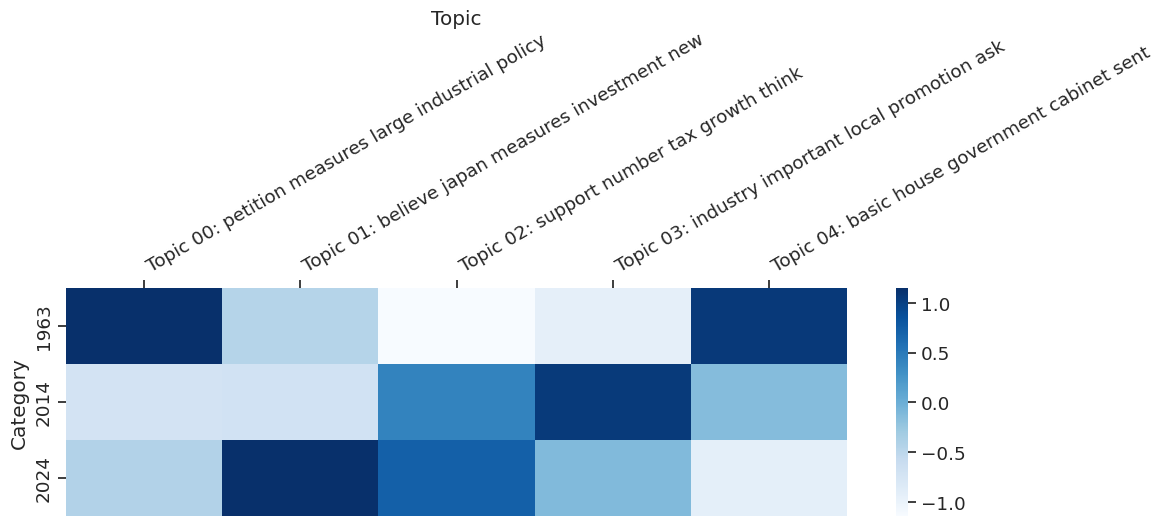

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def combine_files(folder_path):
    combined_text = ""
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                combined_text += file.read() + " "
    return combined_text

folder_1963 = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files1963"
folder_2014 = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2014"
folder_2024 = "/content/drive/MyDrive/Python_course_2024/Final_Project/Translated_Files2024"

text_1963 = combine_files(folder_1963)
text_2014 = combine_files(folder_2014)
text_2024 = combine_files(folder_2024)

documents = []
for text in [text_1963, text_2014, text_2024]:
    words = text.lower().split()
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words_set]
    documents.append(filtered_words)

num_topics = 5
model = tp.LDAModel(k=num_topics, min_cf=3, alpha=0.1, eta=0.01)

for doc in documents:
    model.add_doc(doc)

log_likelihoods = []
for i in range(100):
    model.train(1)
    log_likelihoods.append(model.ll_per_word)

topic_distributions = [doc.get_topic_dist() for doc in model.docs]

topic_keys = []
for topic_id in range(model.k):
    topic_words = [word for word, _ in model.get_topic_words(topic_id, top_n=5)]
    topic_keys.append(topic_words)

labels = ["1963", "2014", "2024"]

def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      color_map='Blues',
                                      dim=(12, 9)):
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        for _topic_index, _probability in enumerate(_distribution):
            dicts_to_plot.append({'Probability': float(_probability),
                                  'Category': _label,
                                  'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index])})

        df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category', columns='Topic', values='Probability')
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()

    plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

plot_categories_by_topics_heatmap(labels=labels,
                                  topic_distributions=topic_distributions,
                                  topic_keys=topic_keys,
                                  color_map='Blues',
                                  dim=(12, 5.5))



The heatmap illustrates the relevance of the deliberation contents to each topic for the years 1963, 2014, and 2024.

According to the figure, the deliberations in 1963 have the highest relevance to Topics 00 and 04, which include structural terms related to the legislation and deliberation process, such as "petition," "cabinet," and "govenment." Topic 03, which includes "local," and "promotion," shows the highest relevance to the 2014 deliberations. Topic 01 and 02, which includes "investment," "tax," and "growth" is most strongly related to the 2024 deliberations.This also reflects the objectives and characteristics of each law.

# **Conclusion**

The results show a shift in the policy objectives of each law. *The Small and Medium-sized Enterprise Basic Act* (1963) established the foundation for targeted policies for SMEs. *The Basic Act on Small Enterprise Promotion* (2014) focused on supporting micro-enterprises, particularly in rural areas. *The Revised Industrial Competitiveness Enhancement Act* (2024) expanded the scope to medium-sized companies, aiming to foster investment and growth in larger businesses.

These legislative changes reflect a progression from foundational policy support for SMEs to bolstering local economies through the support of micro-enterprises, and finally to driving economic growth through investment in medium-sized companies. The results of this project suggest that the evolving classifications of SMEs reflect these shifting objectives.

Contrary to the initial hypothesis, words symbolizing historical contexts such as post-war reconstruction, the Heisei recession, deflation, and inflation did not emerge prominently in the results of this study. Rather, the objectives and characteristics of each law were strongly reflected in the text.

In this project, the minutes of the Diet deliberations were read and analyzed as text data. The results may suggest that, in the Diet deliberations, the purpose, objectives, and characteristics of the law itself, rather than the historical context necessitating the legislation, were primarily discussed. Alternatively, the content of speeches may have influenced the results, as it is customary for the purpose and objectives of the law to be explained at the beginning of parliamentary deliberations.

A limitation of this project is that only the minutes of the Diet deliberations were used as the data source. A similar analysis of public opinion using newspaper articles from before and after the deliberation period would provide a more in-depth understanding of the background to the enactment of the law.

Moving forward, it will be crucial to review the effectiveness of the definitions for each category of classification and consider simplifying them where appropriate. In doing so, it will be essential to carefully analyze the deliberation processes during which each definition was established, using thorough methods such as text analysis using Python.
